In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sys

In [3]:
import Euler.Periodic_2D as elr

## 2D Advection

For the [1D Advection](https://github.com/dhruvbhagtani2105/toy-model/blob/master/Periodic_boundary_conditions.ipynb) case, we used a 1D domain, and using the Euler explicit discretisation method, showed how the error fades away as the number of points in the domain increases. For the 2D case, we need to be aware of two different advection velocities, one in each direction. In fact, this can be an idealised version of an oceanic basin, with surface waves of a particular frequency propagating in the domain.

As an example, we use a sine wave, along with periodic boundary conditions at all four lateral boundaries. The tracer $\phi$ that propagates in this domain is given by:
$$ \frac{\partial \phi}{\partial t} + a_x \frac{\partial \phi}{\partial x} + a_y \frac{\partial \phi}{\partial y} = 0, $$

where $a_x$ and $a_y$ are the advection speeds in the x and y directions respectively. One solution to this equation is:

$$ \phi(x,y,t) = sin(\lambda_1 (x - a_x t) + \lambda_2 (y - a_y t)), $$

where $\lambda_1 = \frac{2 \pi}{L_x}$ and $\lambda_2 = \frac{2 \pi}{L_y}$. At $t = 0$, 

$$ \phi(x,y,0) =  sin(\lambda_1 x + \lambda_2 y). $$

In [45]:
#Length of domain
Lx,Ly = 100,100

#Number of points in the domain
nx,ny = 40,40

#Width of each cell
dx = Lx/nx
dy = Ly/ny

g = 9.81
rho0 = 1025

#An array of all points
xu_ocean = np.linspace(0,Lx,nx+1,dtype = float)
xu_ocean = xu_ocean[0:-1] #Removing last point, needed to implement periodic BC

yu_ocean = np.linspace(0,Ly,ny+1,dtype = float)
yu_ocean = yu_ocean[0:-1] #Removing last point, needed to implement periodic BC

In [50]:
#lambda = 2*pi/L
lmda1 = 2*np.pi/Lx
lmda2 = 2*np.pi/Ly

Y,X = np.meshgrid(yu_ocean,xu_ocean)
#Initialising variables
phi_old = (np.sin(lmda1*X + lmda2*Y))
phi_old_t0 = (np.sin(lmda1*X + lmda2*Y))
phi_new = np.zeros((nx,ny))

#Time parameters
t_start = 0
t_end = 20
dt = 1

#Set switch - (i) FD = 1, (ii) BD = -1, (iii) CD = 0
#By default, switch is set to 0.
switch_diff_scheme = 0    #Switch for diffusion
switch_adv_scheme = -1    #Switch for advection

#Diffusivity and advection speed
#actual_sol = 2*(np.sin(2*np.pi*xu_ocean/(Lx)))
kappa = 4.0
ax,ay = 1,1

for t in np.arange(t_start,t_end,dt):
    phi_new = phi_old - dt*elr.adv_x(ax,phi_old,dx,nx,switch_adv_scheme) - dt*elr.adv_y(
        ay,phi_old,dy,ny,switch_adv_scheme)
    
    phi_old = phi_new

#Theoretical solution
actual_sol = np.sin(lmda1*(X - ax*t) + lmda2*(Y - ay*t))

Text(0.5, 0.92, 'Actual solution')

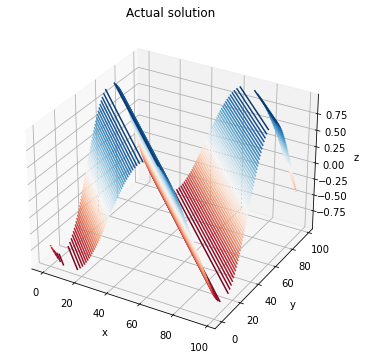

In [51]:
fig = plt.figure(figsize = (10,6))
ax = plt.axes(projection='3d')

ax.contour3D(X, Y, actual_sol, 50, cmap='RdBu')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');
plt.title('Actual solution')

Text(0.5, 0.92, '1D backward difference solution')

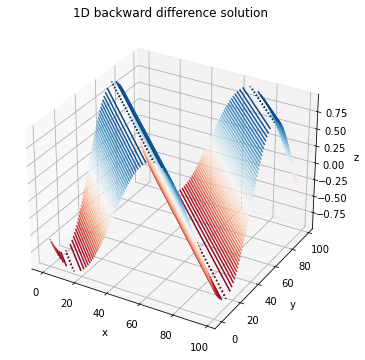

In [52]:
fig = plt.figure(figsize = (10,6))
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, phi_new, 50, cmap='RdBu')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');
plt.title('1D backward difference solution')

## 2D Diffusion

So far, so good. Again, we take inspiration from the [1D Diffusion](https://github.com/dhruvbhagtani2105/toy-model/blob/master/1D_Diffusion.ipynb) case, where we just had an idealised 1D domain, comprising of a diffusivity $\kappa$. For a tracer $\phi$, the 2D diffusion equation can be described as:

$$ \frac{\partial \phi}{\partial t} = \kappa_x \frac{\partial^2 \phi}{\partial x^2} + \kappa_y \frac{\partial^2 \phi}{\partial y^2}, $$

where $/kappa_x$ and $/kappa_y$ are the tracer diffusivities in the x and y direction respectively. One solution to this equation is:

$$ \phi(x,y,t) = e^{-(\lambda_1^2 \kappa_1 + \lambda_2^2 \kappa_2)t} sin(\lambda_1 x + \lambda_2 y),$$

where $\lambda_1 = \frac{2 \pi}{L_x}$ and $\lambda_2 = \frac{2 \pi}{L_y}$. At $t = 0$, we have:

$$ \phi(x,y,0) = sin(\lambda_1 x + \lambda_2 y). $$

In [20]:
#Length of domain
Lx,Ly = 100,100

#Number of points in the domain
nx,ny = 25,25

#Width of each cell
dx = Lx/nx
dy = Ly/ny

g = 9.81
rho0 = 1025

#An array of all points
xu_ocean = np.linspace(0,Lx,nx+1,dtype = float)
xu_ocean = xu_ocean[0:-1]    #Removing last point, needed to implement periodic BC

yu_ocean = np.linspace(0,Ly,ny+1,dtype = float)
yu_ocean = yu_ocean[0:-1]    #Removing last point, needed to implement periodic BC

#Creating a 2D mesh of grid points
Y,X = np.meshgrid(yu_ocean,xu_ocean)

In [24]:
#Wavelength of the wave in x and y directions
lmda1 = (2*np.pi)/Lx
lmda2 = (2*np.pi)/Ly

#Initialising arrays
phi_old = (np.sin(lmda1*X + lmda2*Y))
phi_old_t0 = (np.sin(lmda1*X + lmda2*Y))
phi_new = np.zeros(nx)

#Time parameters
t_start = 0
t_end = 40
dt = 1

#Set switch - (i) FD = 1, (ii) BD = -1, (iii) CD = 0
#By default, switch is set to 0.
switch_diff_scheme = 0

#x and y direction diffusivities
kappa1 = 4.0
kappa2 = 4.0

for t in np.arange(t_start,t_end,dt):
    phi_new = phi_old + dt*elr.diff_x(kappa1,phi_old,dx,nx) + dt*elr.diff_y(kappa2,phi_old,dy,ny)
    
    phi_old = phi_new
    
#Theoretical solution
actual_sol = np.exp(-lmda1**2 * t * kappa1 - lmda2**2 * t * kappa2) * np.sin(lmda1*X + lmda2*Y)

Text(0.5, 0.92, 'Actual solution')

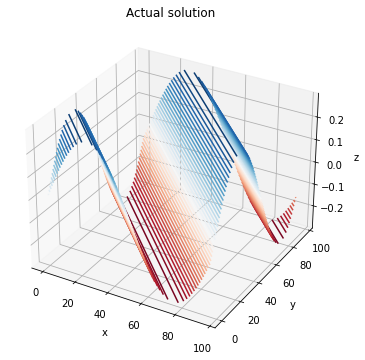

In [25]:
fig = plt.figure(figsize = (10,6))
ax = plt.axes(projection='3d')

ax.contour3D(X, Y, actual_sol, 50, cmap='RdBu')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');
plt.title('Actual solution')

Text(0.5, 0.92, '2D central difference solution')

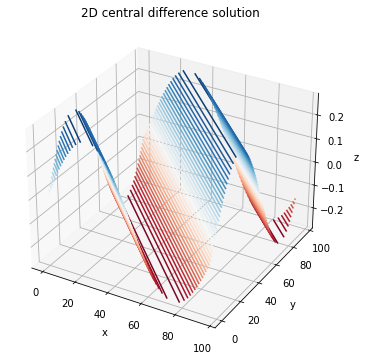

In [26]:
fig = plt.figure(figsize = (10,6))
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, phi_new, 50, cmap='RdBu')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');
plt.title('2D central difference solution')

Text(0.5, 0.92, 'Difference between true and estimated solution')

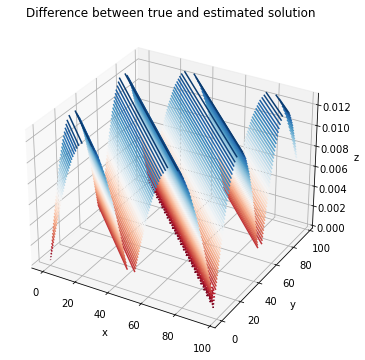

In [14]:
fig = plt.figure(figsize = (10,6))
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, abs(actual_sol - phi_new), 50, cmap='RdBu')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');
plt.title('Difference between true and estimated solution')

## 2D advection-diffusion

Alright, now that we have tested advection and diffusion individually, we try to evaluate a situation where both these processes are happening simultaneouly for a 2D domain, something which we have already done for the 1D case in [1D Advection-Diffusion](https://github.com/dhruvbhagtani2105/toy-model/blob/master/1D_Advction_Diffusion.ipynb). Therefore, for a tracer $\phi$, we can write this as:

$$ \frac{\partial \phi}{\partial t} + a_1 \frac{\partial \phi}{\partial x} + a_2 \frac{\partial \phi}{\partial y} = \kappa_1 \frac{\partial^2 \phi}{\partial x^2} + \kappa_2 \frac{\partial^2 \phi}{\partial y^2}.$$

A solution to this equation is:

$$ \phi(x,y,t) = e^{-(\lambda_1^2 \kappa_1 + \lambda_2^2 \kappa_2)t} sin(\lambda_1 (x - a_1 t) + \lambda_2 (y - a_2 t)),$$

and for $t = 0$, we have:

$$ \phi(x,y,0) = sin(\lambda_1 x + \lambda_2 y) .$$

In [47]:
#Length of domain
Lx,Ly = 100,100

#Number of points in the domain
nx,ny = 30,30

#Width of each cell
dx = Lx/nx
dy = Ly/ny

g = 9.81
rho0 = 1025

#An array of all points
xu_ocean = np.linspace(0,Lx,nx+1,dtype = float)
xu_ocean = xu_ocean[0:-1]     #Removing last point, needed to implement periodic BC

yu_ocean = np.linspace(0,Ly,ny+1,dtype = float)
yu_ocean = yu_ocean[0:-1]     #Removing last point, needed to implement periodic BC

Y,X = np.meshgrid(yu_ocean,xu_ocean)

In [53]:
#Wavelength of the wave in x and y directions
lmda1 = (2*np.pi)/Lx
lmda2 = (2*np.pi)/Ly

#Initialising arrays
phi_old = (np.sin(lmda1*X + lmda2*Y))
phi_old_t0 = (np.sin(lmda1*X + lmda2*Y))
phi_new = np.zeros((nx,ny))

#Time parameters
t_start = 0
t_end = 60
dt = 0.25

#Set switch - (i) FD = 1, (ii) BD = -1, (iii) CD = 0
#By default, switch is set to 0.
switch_diff_scheme = 0
switch_adv_scheme = 0

#x and y direction diffusivities and advection speeds
kappax = 2.0
kappay = 2.0
ax = 1
ay = 1

for t in np.arange(t_start,t_end,dt):
    phi_new = phi_old + dt*elr.diff_x(kappax,phi_old,dx,nx) + dt*elr.diff_y(
        kappay,phi_old,dy,ny) - dt*elr.adv_x(ax,phi_old,dx,nx,switch_adv_scheme) - dt*elr.adv_y(
        ay,phi_old,dy,ny,switch_adv_scheme)
    
    phi_old = phi_new

# Theoretical solution
actual_sol = np.exp(-lmda1**2 * t * kappax - lmda2**2 * t * kappay) * np.sin(lmda1*(X-ax*t) + lmda2*(Y-ay*t))

Text(0.5, 0.92, 'Actual solution')

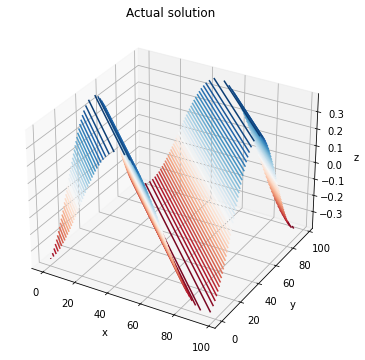

In [54]:
fig = plt.figure(figsize = (10,6))
ax = plt.axes(projection='3d')

ax.contour3D(X, Y, actual_sol, 50, cmap='RdBu')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');
plt.title('Actual solution')

Text(0.5, 0.92, '2D advection-diffusion solution')

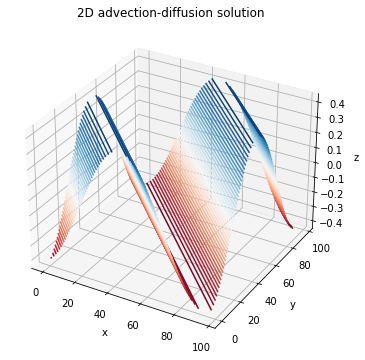

In [55]:
fig = plt.figure(figsize = (10,6))
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, phi_new, 50, cmap='RdBu')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');
plt.title('2D advection-diffusion solution')

Text(0.5, 0.92, '2D advection-diffusion solution')

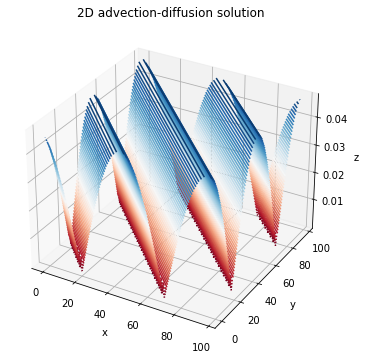

In [56]:
fig = plt.figure(figsize = (10,6))
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, abs(actual_sol - phi_new), 50, cmap='RdBu')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');
plt.title('2D advection-diffusion solution')